# Florian Guillot : Project 6
### Wine o meter
### Jedha Full Stack, dsmf-paris-13
### 08-2021

Predict and deliver the wine'squality (feature = chimical components, target = quality) trough an API and build a web-app

the app was previously at the adresse : 
https://wine-o-meter-vflo.herokuapp.com/

It has been depreciated

-----

# **1) Initialization**
----
## **1.1) We begin with the Import of the different libraries we will use and their configurations**
----

In [2]:
import os
import joblib
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
from Functions import *

## **1.2) Data collection**
---

In [4]:
DATASET_PATH = "winequality.csv"
# Load dataset
df = pd.read_csv(DATASET_PATH)

# **2) DEA**
---

## **2.1) Dataset Overview**
---

In [5]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## **2.1) Handling missing values**
---

In [7]:
print("Dataset's Shape : ",df.shape)
print('Missing values in the dataset for each column : \n')
df.isnull().sum()

Dataset's Shape :  (6497, 13)
Missing values in the dataset for each column : 



type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### **We decide to drop all the lines with missing values**

In [8]:
df.dropna(inplace = True)
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## **2.2) Repartition of the target**
---

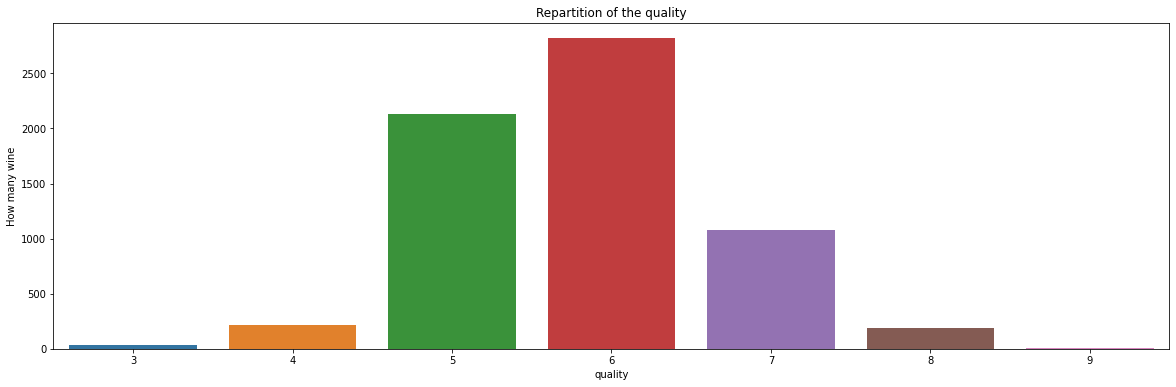

In [9]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x = df["quality"]);
ax.set_ylabel("How many wine")
ax.set_title("Repartition of the quality")
plt.show();

## **2.2) Features analysis**
---

### We plot the relations between all the data

<Figure size 1200x640 with 0 Axes>

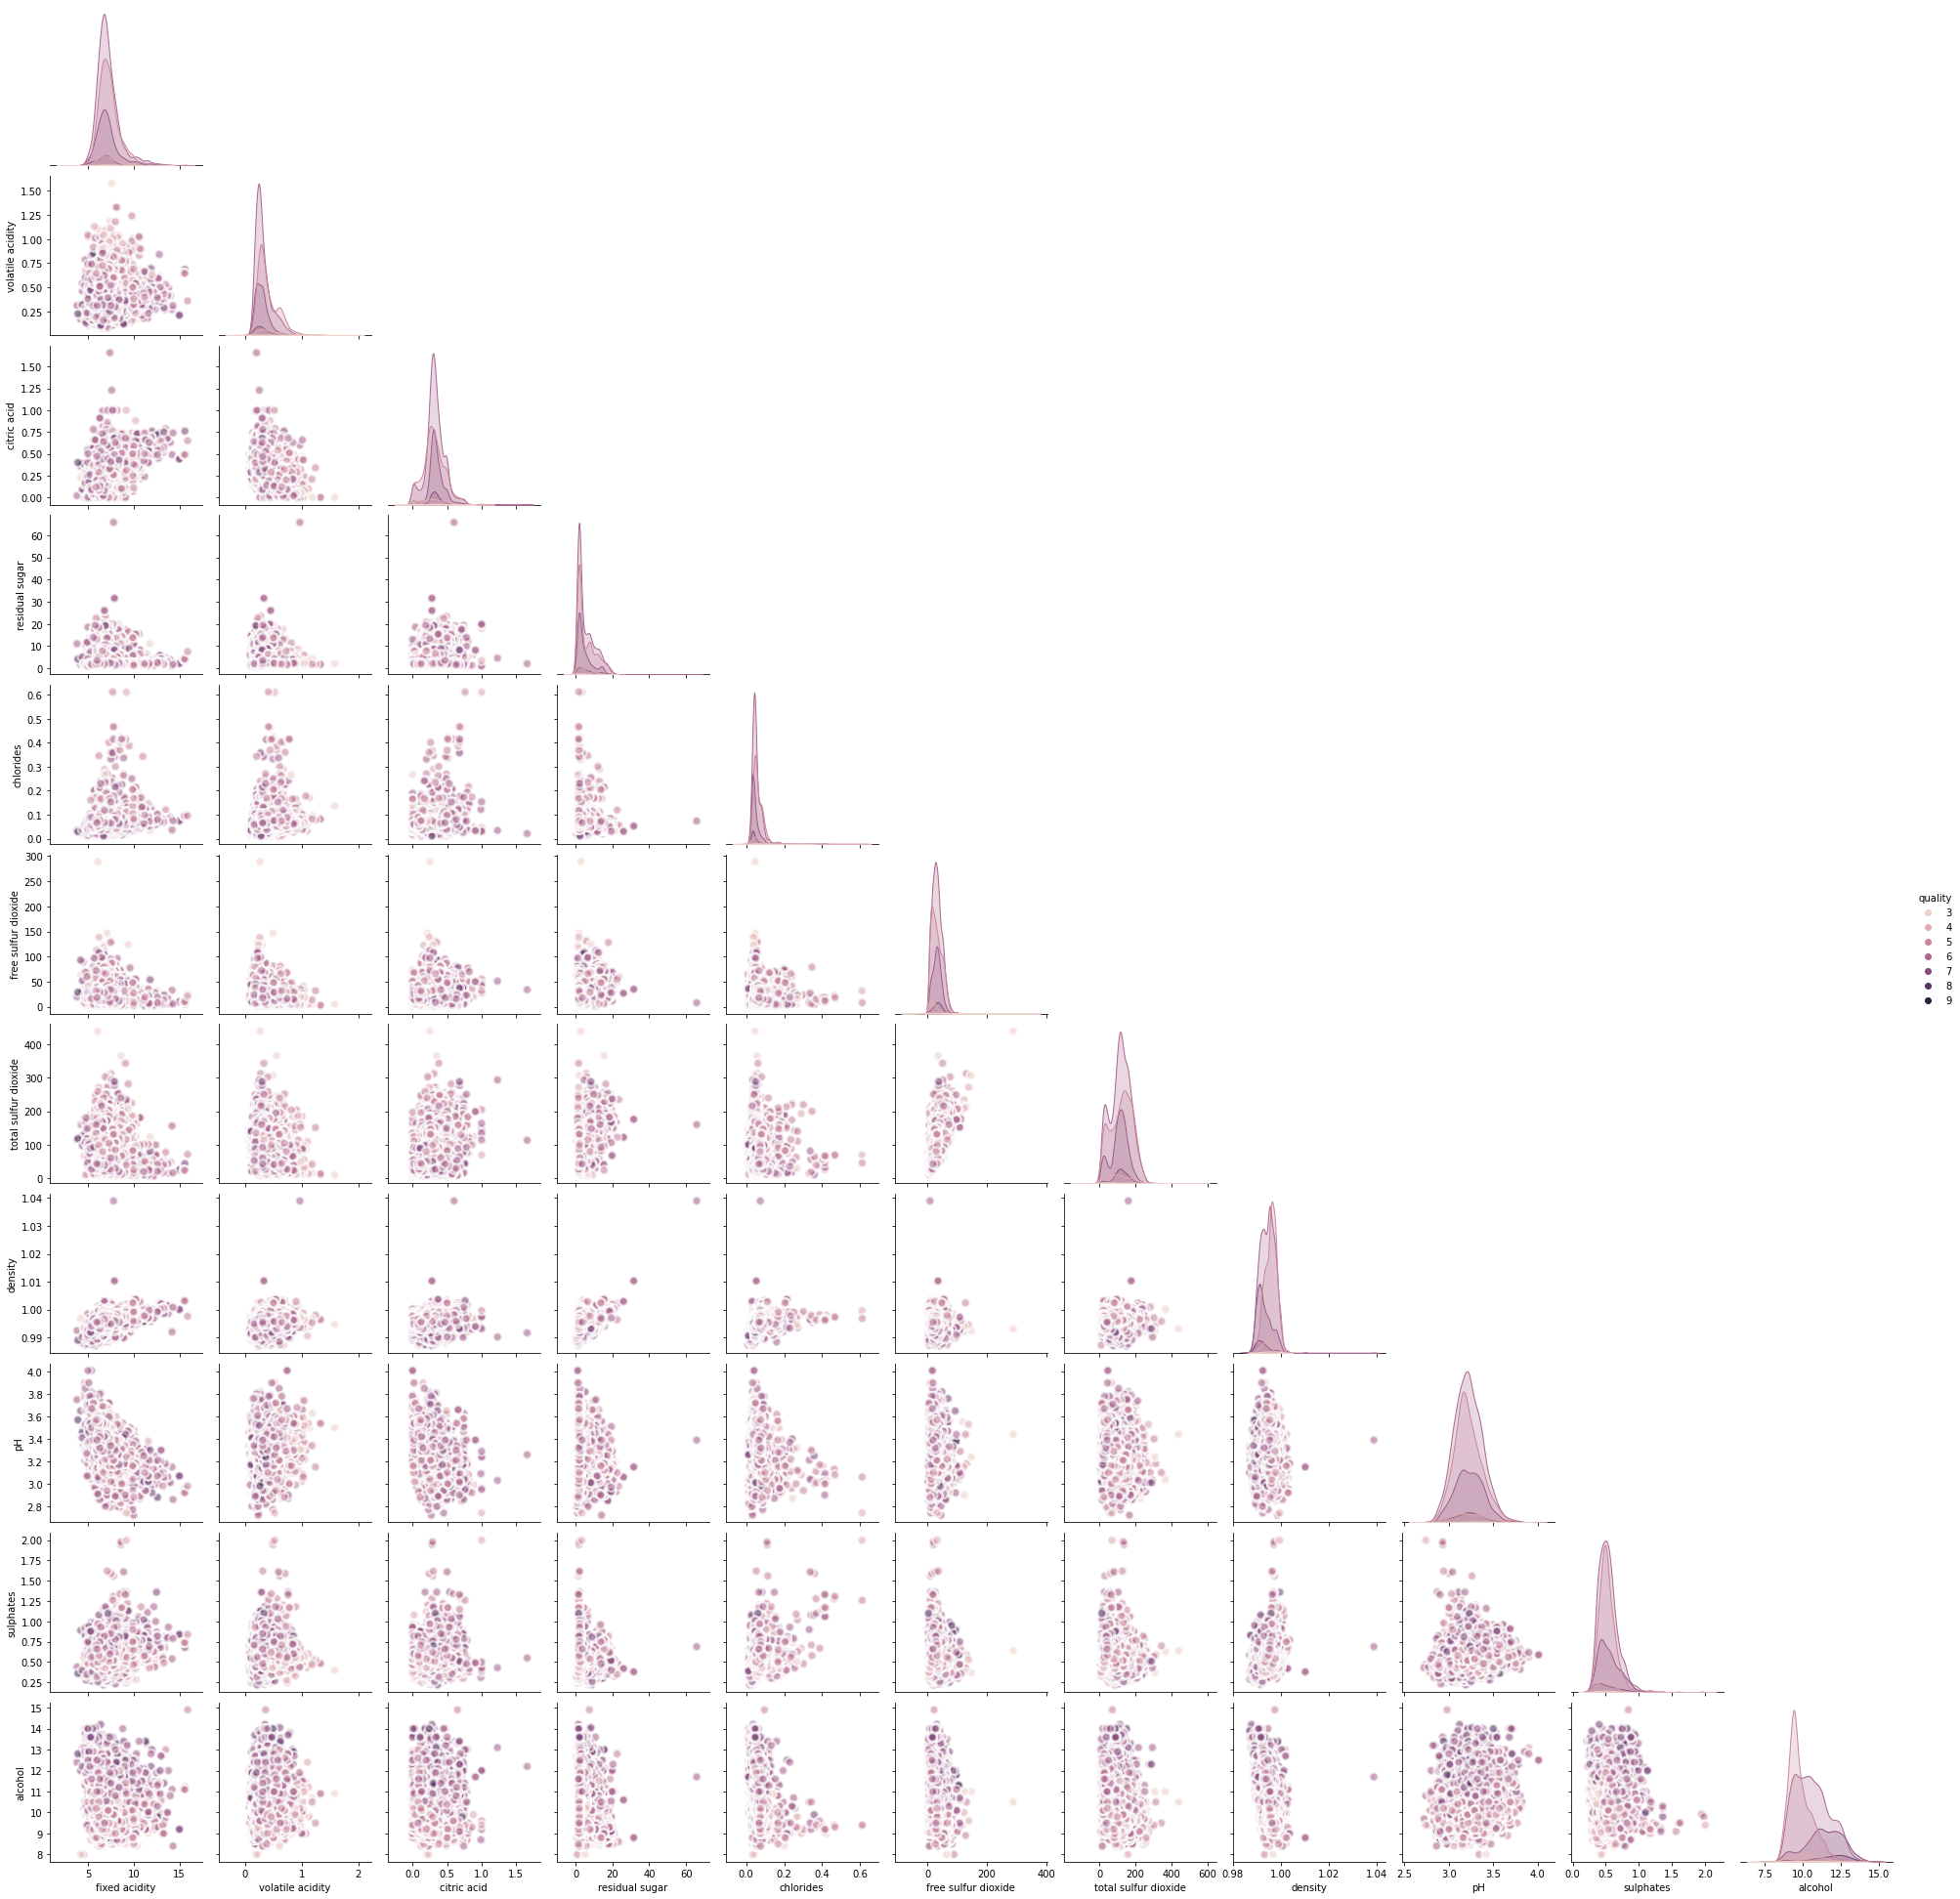

In [10]:
# Plot
plt.figure(figsize=(15,8), dpi= 80)
sns.pairplot(df, 
        plot_kws=dict(alpha= 0.6, 
            s=80, 
            #edgecolor="k", 
            linewidth=2.5), 
        hue='quality', 
        diag_kind = 'kde',
        corner=True)
plt.show();

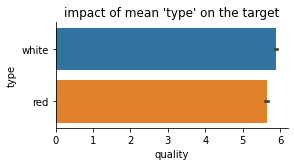

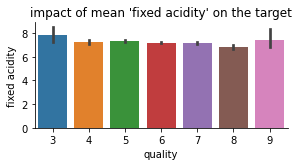

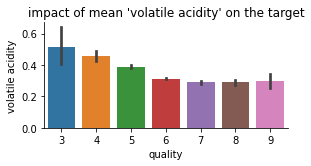

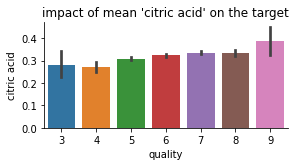

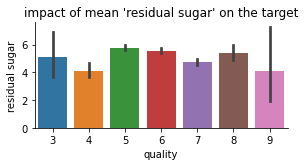

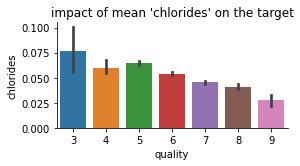

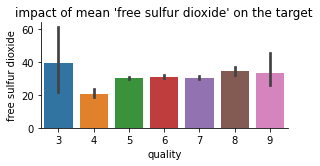

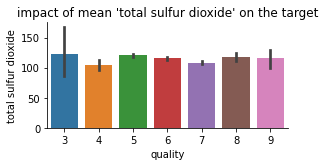

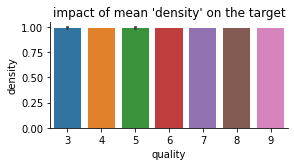

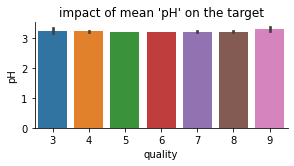

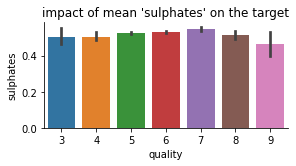

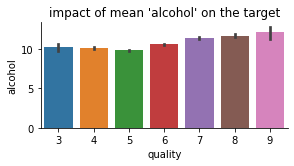

In [49]:
for col in df.drop(['quality'], axis=1).columns:
    ax = sns.catplot( x="quality",
                    y=col,
                    data = df,
                    kind='bar',
                    height=2,
                    aspect=2,
                    )
    ax.set(title="impact of mean '{}' on the target".format(col))
    plt.show()

# **3) Building the model**
---

and saving it with joblib

In [56]:
# Get X and y
X = df.drop(['quality','type'], axis=1)
y = df["quality"]
# Split dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Our LogisticRegression model
classifier = DecisionTreeClassifier(class_weight = 'balanced')
# Fit our classifier
classifier.fit(X_train, y_train)
# Compute accuracy on test set
print("Accuracy: {:.2f}".format(classifier.score(X_test, y_test)))
# Save our model with joblib
joblib.dump(classifier, os.path.join('models/', "quality_classifier.joblib"))

Accuracy: 0.57


['models/quality_classifier.joblib']